In [1]:
using Plots
include("polyfit_function.jl")
include("Lagrange_interpolation.jl")

Lagrange (generic function with 1 method)

In [2]:
# Two-step Adams Bashforth Scheme (Explicit)

function ab2(f, tspan, y0, N)
    h = (tspan[2] - tspan[1]) / N
    
    t = Vector(range(tspan[1], tspan[2], length=N+1))
    
    y = zeros(N + 1, 1)
    
    y[1] = y0
    
    y[2]=y[1]+h*f(t[1], y[1]) # First-order initial condition (FE)
    
    #k1=h*f(t[1], y[1])
    #k2=h*f(t[1]+h, y[1]+k1)
    #y[2]=y[1]+0.5*(k1+k2)
    
    # Two -step AB steps
    for i in 2:N
        y[i + 1] = y[i] + (3/2) *h* f(t[i], y[i]) - 0.5 *h* f(t[i-1], y[i-1])
    end

    return t, y
end

ab2 (generic function with 1 method)

convergence order = 1.9130087989964486


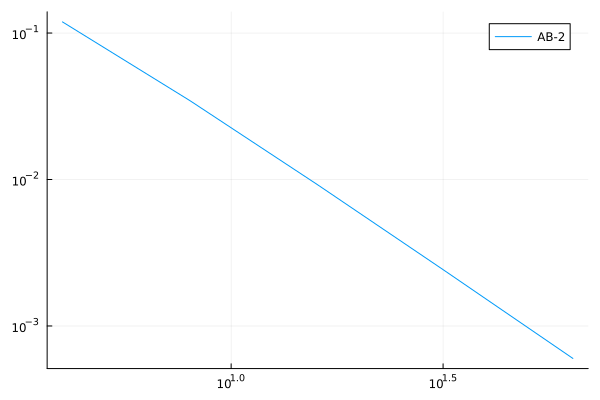

In [3]:
# Convergence Analysis of Trapezoidal method
using LinearAlgebra

y0 = 1.0
lambda= 1
tspan=[0 1.0]
K = 5
err = zeros(K, 1)
ns=zeros(K, 1)

f(t, y) = lambda * y

exact= y0*exp(lambda*tspan[2])

for k in 1:K
    
    N = 4* 2^(k-1)
    
    ns[k]=N
    
    h = (tspan[2] - tspan[1]) / N
    
    
    (t, y) = ab2(f, tspan, y0, N)
   
    err[k] = norm(exact .- y[N+1])
end

# Compute order of convergence and error plot
pdeg = polyfit(log10.(ns[:]), log10.(err[:]),1)
print("convergence order = ",abs(pdeg[2]),"\n") 
plot(ns, err[:],xaxis=:log, yaxis=:log, label="AB-2")
display(plot!(legend=:topright))

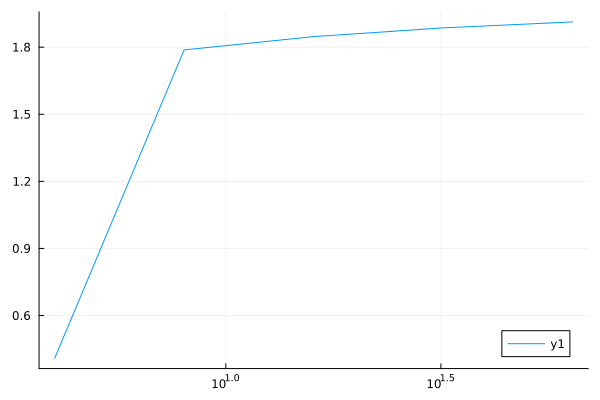

In [4]:
order2=zeros(K)
for i= 1:K
    pdeg = polyfit(log10.(ns[1:i]), log10.(err[1:i]),1)
    order2[i]=abs(pdeg[2])
end
plot(ns, order2, xaxis=:log)

In [5]:
function ab3(f, tspan, y0, N)
    h = (tspan[2] - tspan[1]) / N
    
    t = Vector(range(tspan[1], tspan[2], length=N+1))
    
    y = zeros(N + 1, 1)
    
    y[1] = y0
    
    # 2nd-order starting conditions
    for j=2:3
        k1=h*f(t[j-1], y[j-1])
        k2=h*f(t[j-1]+h, y[j-1]+ k1)
        y[j]=y[j-1]+ 0.5*(k1+k2)
    end
    
    
    # 3rd-order starting conditions
    #for j=2:3
        #k1=h*f(t[j-1], y[j-1])
        #k2=h*f(t[j-1]+0.5*h, y[j-1]+ 0.5*k1)
        #k3= h*f(t[j-1]+h, y[j-1] -k1+ 2*k2)
        #y[j]=y[j-1]+ (1/6)*k1 + (2/3)*k2+ (1/6)*k3
    #end
    
    # Three -step AB steps
    for i in 3:N
        y[i + 1] = y[i] + (23/12) * h* f(t[i], y[i]) - (16/12)*h* f(t[i-1], y[i-1]) + (5/12)*h*f(t[i-2], y[i-2]) 
    end

    return t, y
end

ab3 (generic function with 1 method)

convergence order = 2.9914401672415534


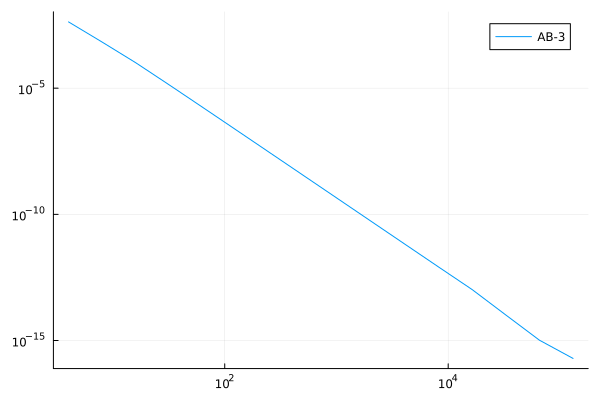

In [6]:
# Convergence Analysis of Trapezoidal method
using LinearAlgebra

y0 = 1.0
lambda= -1
tspan=[0 2]
K = 16
err3 = zeros(K, 1)
ns=zeros(K, 1)

f(t, y) = lambda * y

exact= y0*exp(lambda*tspan[2])

for k in 1:K
    
    N = 4* 2^(k-1)
    
    ns[k]=N
    
    h = (tspan[2] - tspan[1]) / N
    
    
    (t, y) = ab3(f, tspan, y0, N)
   
    err3[k] = abs(exact .- y[N+1])
end

# Compute order of convergence and error plot
pdeg = polyfit(log10.(ns[:]), log10.(err3[:]),1)
print("convergence order = ",abs(pdeg[2]),"\n") 
plot(ns, err3[:],xaxis=:log, yaxis=:log, label="AB-3")
display(plot!(legend=:topright))

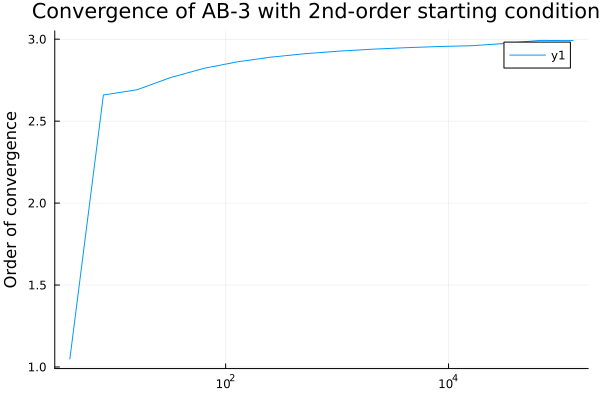

In [7]:
order3=zeros(K)
for i= 1:K
    pdeg = polyfit(log10.(ns[1:i]), log10.(err3[1:i]),1)
    order3[i]=abs(pdeg[2])
end
plot(ns, order3, xaxis=:log, ylabel="Order of convergence", title="Convergence of AB-3 with 2nd-order starting conditions", )